In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from datetime import date

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.10f}'.format)


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df= pd.read_csv('/Users/ranjitsingh/Documents/Nexthikes-Projects/Project5-unsupervised learning /telcom_data.csv')

In [4]:
df.shape

(150001, 55)

In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(150001, 55)

# Data Manipulation

In [12]:
df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)

In [14]:
df.columns = df.columns.str.strip()

In [16]:
df.head()

Bearer Id          Start       Start ms  \
0 13114500000000000000.0000000000   4/4/19 12:01 770.0000000000   
1 13114500000000000000.0000000000   4/9/19 13:04 235.0000000000   
2 13114500000000000000.0000000000   4/9/19 17:42   1.0000000000   
3 13114500000000000000.0000000000   4/10/19 0:31 486.0000000000   
4 13114500000000000000.0000000000  4/12/19 20:10 565.0000000000   

             End         End ms          Dur. (ms)                       IMSI  \
0  4/25/19 14:35 662.0000000000 1823652.0000000000 208201448079117.0000000000   
1   4/25/19 8:15 606.0000000000 1365104.0000000000 208201909211140.0000000000   
2  4/25/19 11:58 652.0000000000 1361762.0000000000 208200314458056.0000000000   
3   4/25/19 7:36 171.0000000000 1321509.0000000000 208201402342131.0000000000   
4  4/25/19 10:40 954.0000000000 1089009.0000000000 208201401415120.0000000000   

           MSISDN/Number                      IMEI Last Location Name  \
0 33664962239.0000000000 35521209507511.0000000000        9.16457E+15   
1 33681854413.0000000000 35794009006359.0000000000            L77566A   
2 33760627129.0000000000 35281510359387.0000000000            D42335A   
3 33750343200.0000000000 35356610164913.0000000000            T21824A   
4 33699795932.0000000000 35407009745539.0000000000            D88865A   

   Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0    42.0000000000     5.0000000000            23.0000000000   
1    65.0000000000     5.0000000000            16.0000000000   
2              NaN              NaN             6.0000000000   
3              NaN              NaN            44.0000000000   
4              NaN              NaN             6.0000000000   

   Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
0            44.0000000000                          NaN   
1            26.0000000000                          NaN   
2             9.0000000000                          NaN   
3            44.0000000000                          NaN   
4             9.0000000000                          NaN   

   TCP UL Retrans. Vol (Bytes)  DL TP < 50 Kbps (%)  \
0                          NaN       100.0000000000   
1                          NaN       100.0000000000   
2                          NaN       100.0000000000   
3                          NaN       100.0000000000   
4                          NaN       100.0000000000   

   50 Kbps < DL TP < 250 Kbps (%)  250 Kbps < DL TP < 1 Mbps (%)  \
0                    0.0000000000                   0.0000000000   
1                    0.0000000000                   0.0000000000   
2                    0.0000000000                   0.0000000000   
3                    0.0000000000                   0.0000000000   
4                    0.0000000000                   0.0000000000   

   DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  10 Kbps < UL TP < 50 Kbps (%)  \
0        0.0000000000       100.0000000000                   0.0000000000   
1        0.0000000000       100.0000000000                   0.0000000000   
2        0.0000000000       100.0000000000                   0.0000000000   
3        0.0000000000       100.0000000000                   0.0000000000   
4        0.0000000000       100.0000000000                   0.0000000000   

   50 Kbps < UL TP < 300 Kbps (%)  UL TP > 300 Kbps (%)  HTTP DL (Bytes)  \
0                    0.0000000000          0.0000000000              NaN   
1                    0.0000000000          0.0000000000              NaN   
2                    0.0000000000          0.0000000000              NaN   
3                    0.0000000000          0.0000000000              NaN   
4                    0.0000000000          0.0000000000              NaN   

   HTTP UL (Bytes)  Activity Duration DL (ms)  Activity Duration UL (ms)  \
0              NaN           37624.0000000000           38787.0000000000   
1              NaN             168.0000000000            3560.0000000000   
2              NaN               0.0000000000               0.00000

In [18]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [22]:
df['Handset Type'].value_counts(dropna=False).head()

Handset Type
Huawei B528S-23A           19752
Apple iPhone 6S (A1688)     9419
Apple iPhone 6 (A1586)      9023
undefined                   8987
Apple iPhone 7 (A1778)      6326
Name: count, dtype: int64

In [24]:
df['Handset Type'].nunique()

1396

In [26]:
df['Handset Manufacturer'].value_counts(dropna=False).head()

Handset Manufacturer
Apple                            59565
Samsung                          40839
Huawei                           34423
undefined                         8987
Sony Mobile Communications Ab      980
Name: count, dtype: int64

In [28]:
df['Handset Manufacturer'].nunique()

170

In [30]:
df['Handset Manufacturer'] = df['Handset Manufacturer'].replace('undefined', 'Unknown')
df['Handset Type'] = df['Handset Type'].replace('undefined', 'Unknown')

In [32]:
df[df.select_dtypes(exclude='object').columns] = df.select_dtypes(exclude='object').fillna(0)
df.dropna(inplace =True)

In [33]:
df.isnull().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [35]:
df.shape

(148837, 55)

In [38]:
df.describe()

Bearer Id          Start ms            End ms  \
count               148837.0000000000 148837.0000000000 148837.0000000000   
mean  10138857317132165120.0000000000    499.1637428865    498.6786417356   
std    2893140635185012736.0000000000    288.6210378435    288.1003177202   
min    6917540000000000000.0000000000      0.0000000000      0.0000000000   
25%    7349880000000000000.0000000000    250.0000000000    251.0000000000   
50%    7349880000000000000.0000000000    499.0000000000    500.0000000000   
75%   13042400000000000000.0000000000    749.0000000000    750.0000000000   
max   13186500000000000000.0000000000    999.0000000000    999.0000000000   

               Dur. (ms)                       IMSI  \
count  148837.0000000000          148837.0000000000   
mean   105016.1178873533 208201639639225.0625000000   
std     81011.8273012352     21530748358.2946434021   
min      7142.0000000000 204047108489451.0000000000   
25%     58151.0000000000 208201401263920.0000000000   
50%     86399.0000000000 208201546331184.0000000000   
75%    132848.0000000000 208201771620051.0000000000   
max   1859336.0000000000 214074303349628.0000000000   

                   MSISDN/Number                      IMEI   Avg RTT DL (ms)  \
count          148837.0000000000         148837.0000000000 148837.0000000000   
mean      41777144012.3395767212 48478815590442.0156250000     86.1896638605   
std     2448250101896.1401367188 22417133588233.2031250000    529.3820020805   
min                 0.0000000000   440015202000.0000000000      0.0000000000   
25%       33650998720.0000000000 35460708933271.0000000000     24.0000000000   
50%       33663661405.0000000000 35722106532371.0000000000     38.0000000000   
75%       33683313057.0000000000 86119704675100.0000000000     61.0000000000   
max   882397108489451.0000000000 99001201327774.0000000000  96923.0000000000   

        Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
count 148837.0000000000        148837.0000000000        148837.0000000000   
mean      14.3898627357         13314.2141268636          1771.4818627089   
std       76.9375295577         24013.8202157402          4627.9797741998   
min        0.0000000000             0.0000000000             0.0000000000   
25%        1.0000000000            43.0000000000            47.0000000000   
50%        4.0000000000            63.0000000000            62.0000000000   
75%       11.0000000000         19765.0000000000          1119.0000000000   
max     7120.0000000000        378160.0000000000         58613.0000000000   

       TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
count            148837.0000000000            148837.0000000000   
mean            8597455.9190053549            271847.6290774471   
std           117617158.3509002179          15841907.6852743067   
min                   0.0000000000                 0.0000000000   
25%                   0.0000000000                 0.0000000000   
50%                   0.0000000000                 0.0000000000   
75%              199133.0000000000              6437.0000000000   
max          4294425570.0000000000        2908226006.0000000000   

       DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
count    148837.0000000000               148837.0000000000   
mean         92.4251899729                    3.0439608431   
std          14.4634200758                    6.1956667663   
min           0.0000000000                    0.0000000000   
25%          90.0000000000                    0.0000000000   
50%         100.0000000000                    0.0000000000   
75%         100.0000000000                    4.0000000000   
max         100.0000000000                   93.0000000000   

       250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
count              148837.0000000000   148837.0000000000    148837.0000000000   
mean                    1.7086342778        1.6049369444        98.0225212817   
std              

In [39]:
df.head()

Bearer Id          Start       Start ms  \
0 13114500000000000000.0000000000   4/4/19 12:01 770.0000000000   
1 13114500000000000000.0000000000   4/9/19 13:04 235.0000000000   
2 13114500000000000000.0000000000   4/9/19 17:42   1.0000000000   
3 13114500000000000000.0000000000   4/10/19 0:31 486.0000000000   
4 13114500000000000000.0000000000  4/12/19 20:10 565.0000000000   

             End         End ms          Dur. (ms)                       IMSI  \
0  4/25/19 14:35 662.0000000000 1823652.0000000000 208201448079117.0000000000   
1   4/25/19 8:15 606.0000000000 1365104.0000000000 208201909211140.0000000000   
2  4/25/19 11:58 652.0000000000 1361762.0000000000 208200314458056.0000000000   
3   4/25/19 7:36 171.0000000000 1321509.0000000000 208201402342131.0000000000   
4  4/25/19 10:40 954.0000000000 1089009.0000000000 208201401415120.0000000000   

           MSISDN/Number                      IMEI Last Location Name  \
0 33664962239.0000000000 35521209507511.0000000000        9.16457E+15   
1 33681854413.0000000000 35794009006359.0000000000            L77566A   
2 33760627129.0000000000 35281510359387.0000000000            D42335A   
3 33750343200.0000000000 35356610164913.0000000000            T21824A   
4 33699795932.0000000000 35407009745539.0000000000            D88865A   

   Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0    42.0000000000     5.0000000000            23.0000000000   
1    65.0000000000     5.0000000000            16.0000000000   
2     0.0000000000     0.0000000000             6.0000000000   
3     0.0000000000     0.0000000000            44.0000000000   
4     0.0000000000     0.0000000000             6.0000000000   

   Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
0            44.0000000000                 0.0000000000   
1            26.0000000000                 0.0000000000   
2             9.0000000000                 0.0000000000   
3            44.0000000000                 0.0000000000   
4             9.0000000000                 0.0000000000   

   TCP UL Retrans. Vol (Bytes)  DL TP < 50 Kbps (%)  \
0                 0.0000000000       100.0000000000   
1                 0.0000000000       100.0000000000   
2                 0.0000000000       100.0000000000   
3                 0.0000000000       100.0000000000   
4                 0.0000000000       100.0000000000   

   50 Kbps < DL TP < 250 Kbps (%)  250 Kbps < DL TP < 1 Mbps (%)  \
0                    0.0000000000                   0.0000000000   
1                    0.0000000000                   0.0000000000   
2                    0.0000000000                   0.0000000000   
3                    0.0000000000                   0.0000000000   
4                    0.0000000000                   0.0000000000   

   DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  10 Kbps < UL TP < 50 Kbps (%)  \
0        0.0000000000       100.0000000000                   0.0000000000   
1        0.0000000000       100.0000000000                   0.0000000000   
2        0.0000000000       100.0000000000                   0.0000000000   
3        0.0000000000       100.0000000000                   0.0000000000   
4        0.0000000000       100.0000000000                   0.0000000000   

   50 Kbps < UL TP < 300 Kbps (%)  UL TP > 300 Kbps (%)  HTTP DL (Bytes)  \
0                    0.0000000000          0.0000000000     0.0000000000   
1                    0.0000000000          0.0000000000     0.0000000000   
2                    0.0000000000          0.0000000000     0.0000000000   
3                    0.0000000000          0.0000000000     0.0000000000   
4                    0.0000000000          0.0000000000     0.0000000000   

   HTTP UL (Bytes)  Activity Duration DL (ms)  Activity Duration UL (ms)  \
0     0.0000000000           37624.0000000000           38787.0000000000   
1     0.0000000000             168.0000000000            3560.0000000000   
2     0.0000000000               0.0000000000               0.00000

## Identifying Top 10 handsets used by the customers

In [43]:
Top_ten_handset = df.groupby(['Handset Type']).agg(Total =('MSISDN/Number','count')
                                                  ).sort_values(by = 'Total', ascending =False).head(10).reset_index()
Top_ten_handset.style.background_gradient(cmap='YlGnBu', axis=None)

# Indentifying Top 3 handset manufacturers

In [46]:
Top_three_manufacturers = df.groupby(['Handset Manufacturer']).agg(Total =('MSISDN/Number','count')
                                                  ).sort_values(by='Total', ascending =False).head(3).reset_index()
Top_three_manufacturers.style.background_gradient(cmap='YlGnBu', axis=None)

# Indentifying Top 5 handsets per top 3 handset manufacturer

In [49]:
df_Top_manufacturers = df[df['Handset Manufacturer'].isin(['Apple', 'Samsung', 'Huawei'])]

top_handsets_per_manufacturer = df_Top_manufacturers.groupby(
        ['Handset Manufacturer','Handset Type']).agg(Total= ('MSISDN/Number','count')).reset_index().sort_values(
   ['Handset Manufacturer','Total'],ascending = [True,False]).groupby('Handset Manufacturer').head(5)
top_handsets_per_manufacturer.style.background_gradient(cmap='YlGnBu', axis=None)


# Infer:
The analysis identifies the top 5 most-used handset models for each of the top 3 handset manufacturers based on user count. 
This reveals which specific handset models dominate user preference within each leading brand.

# Recommendations for Marketing Teams:
Prioritize Popular Models: Focus marketing efforts and promotions around the top 5 handset models for each top brand—they have the highest user adoption and brand visibility.

Target Loyalty Campaigns: Engage existing users of these popular handsets with loyalty programs, app partnerships, or upgrade offers.

Influencer & Ad Targeting: Use these specific handset models to fine-tune ad targeting or influencer collaborations,
ensuring relevance to the most active user base.

Market Research Benchmarking: Use these handset insights to benchmark competitors and identify areas for product improvement or bundling strategies.
    

# Univariate Analysis

### Compute range, variance, std deviation, IQR for quantitative columns to form Histograms

In [55]:
quant_cols = df.select_dtypes(include=np.number).columns

dispersion = pd.DataFrame(index=quant_cols)
dispersion['Range'] = df[quant_cols].max() - df[quant_cols].min()
dispersion['Variance'] = df[quant_cols].var()
dispersion['Standard Deviation'] = df[quant_cols].std()
dispersion['IQR'] = df[quant_cols].quantile(0.75) - df[quant_cols].quantile(0.25)


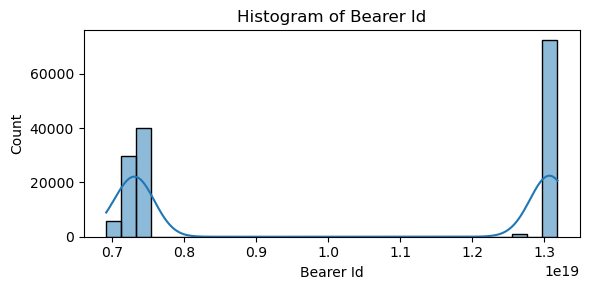

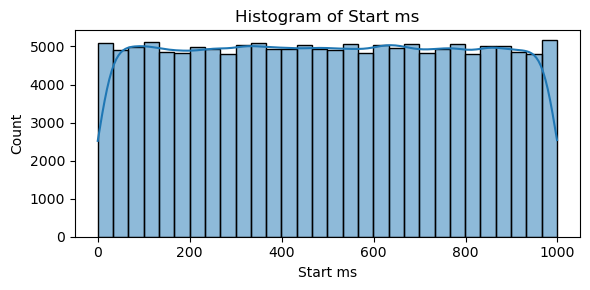

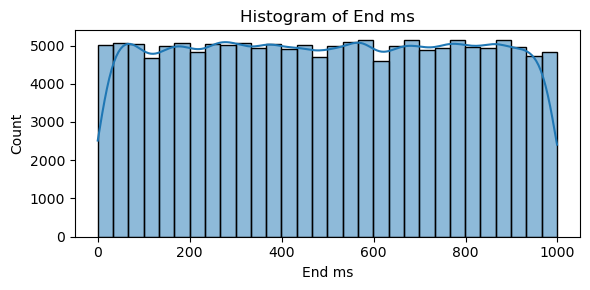

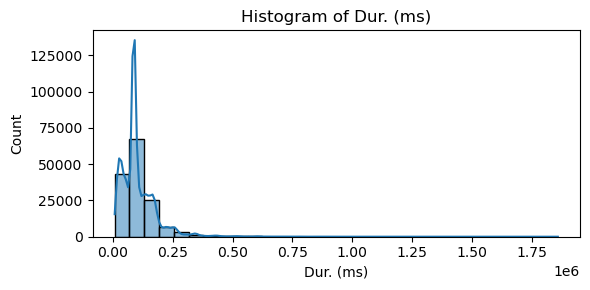

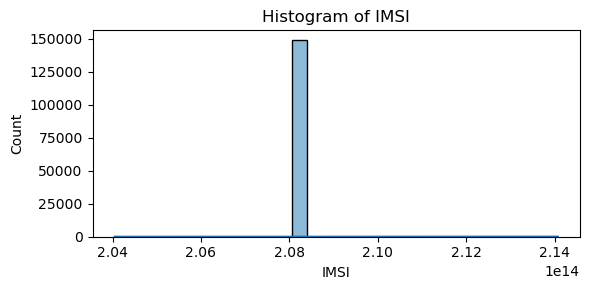

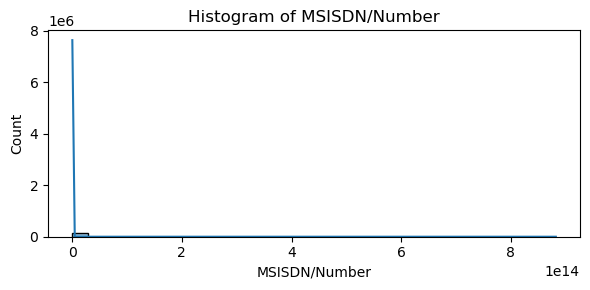

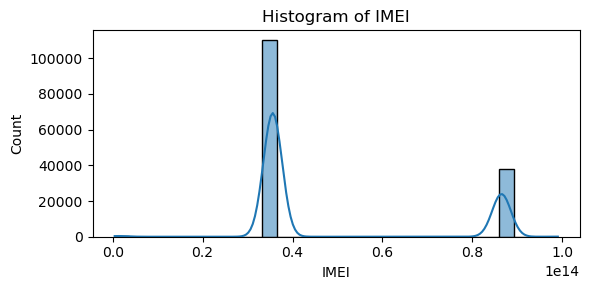

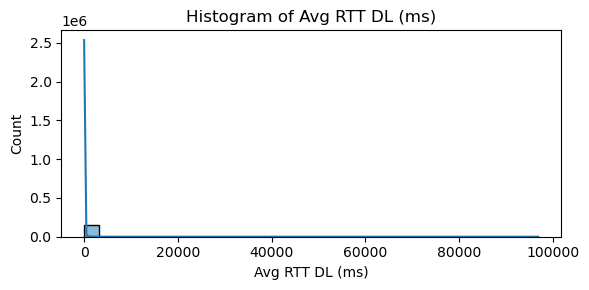

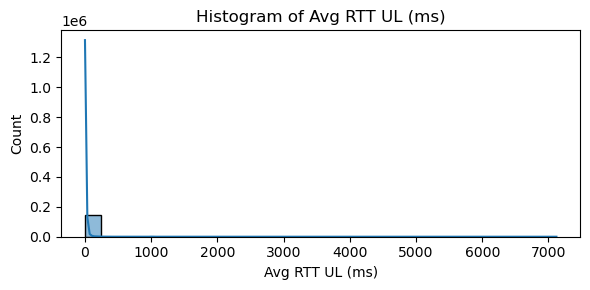

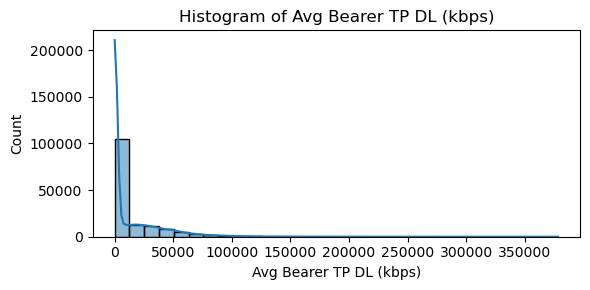

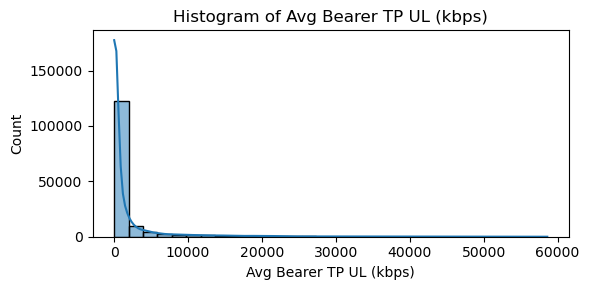

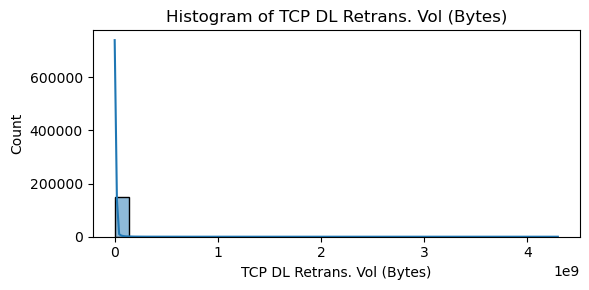

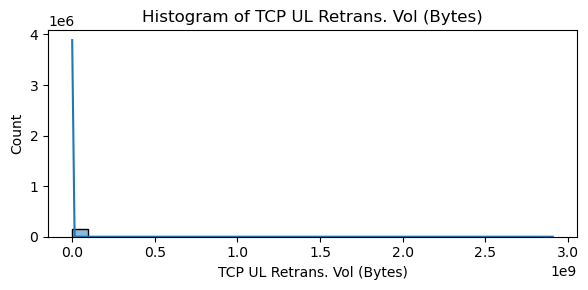

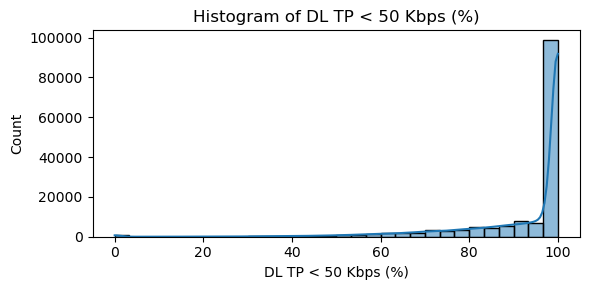

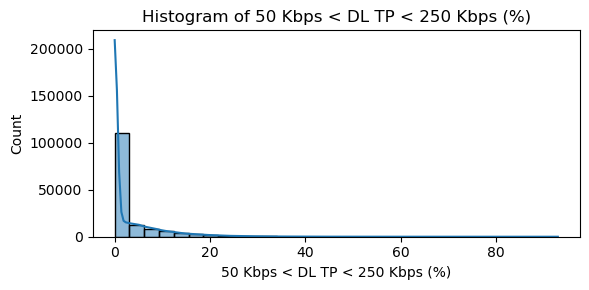

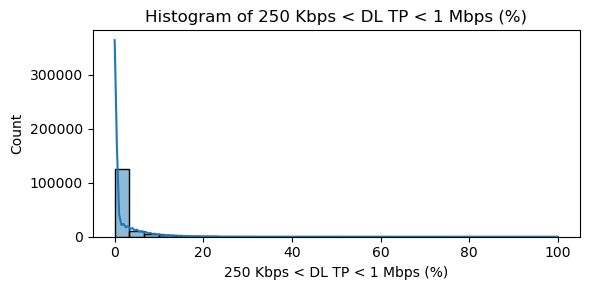

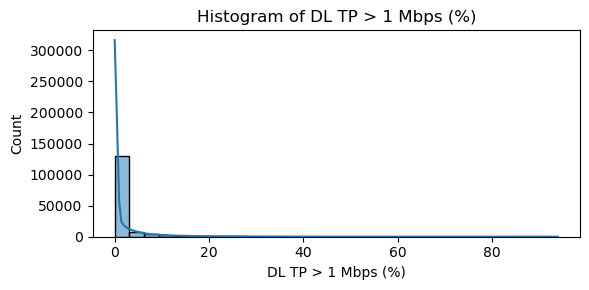

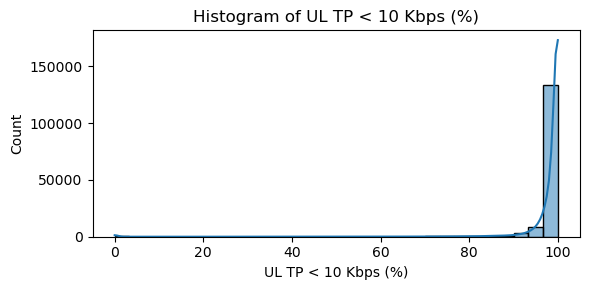

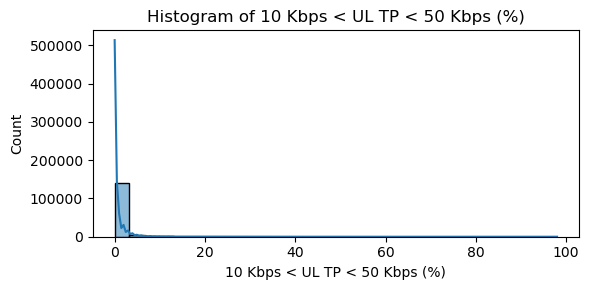

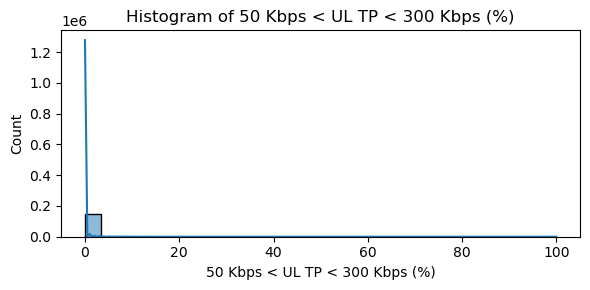

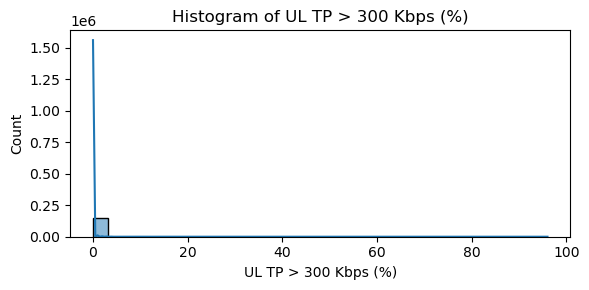

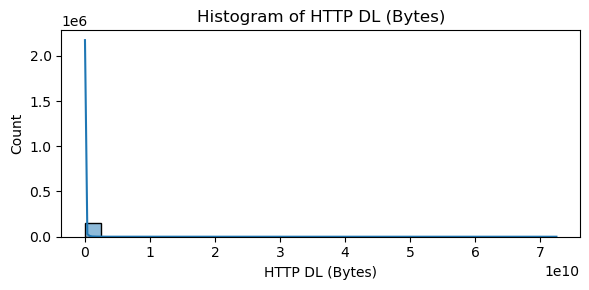

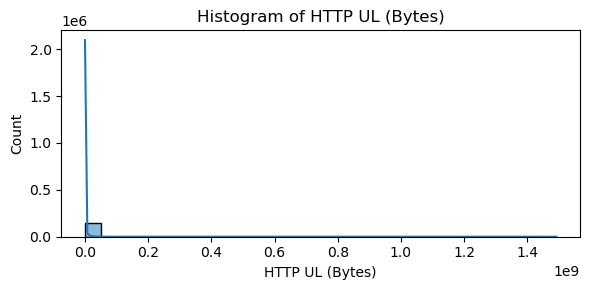

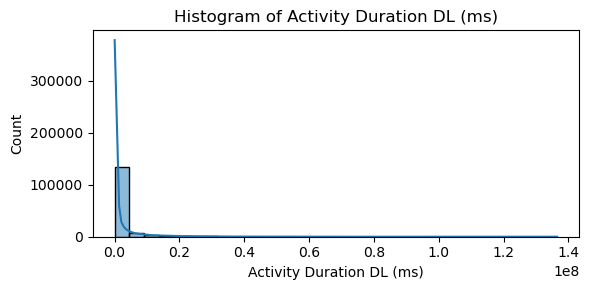

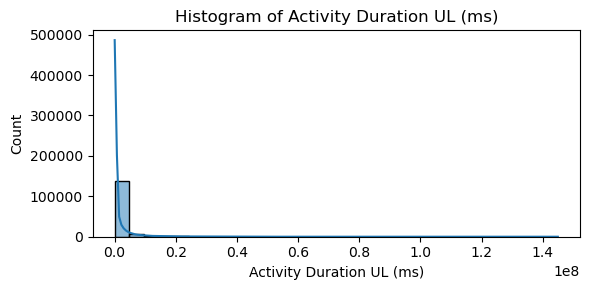

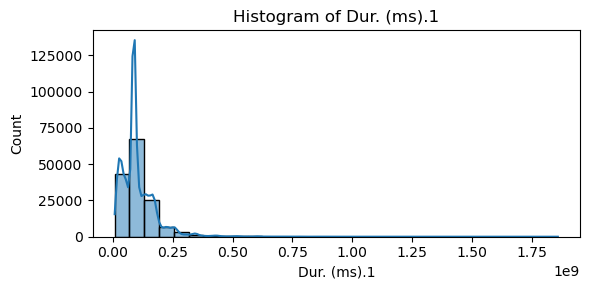

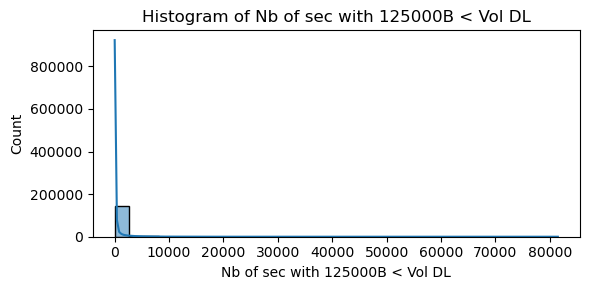

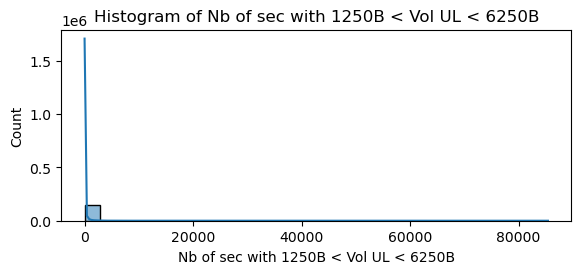

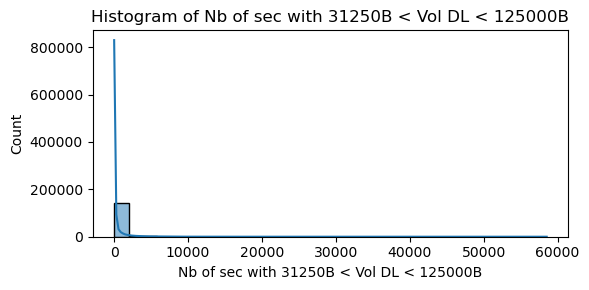

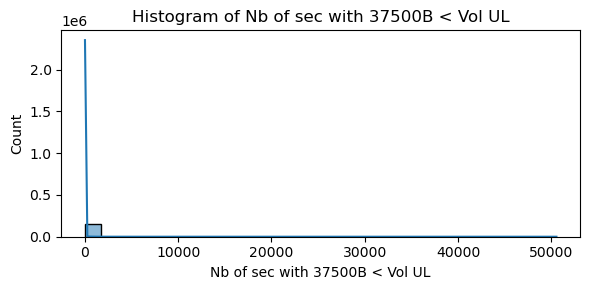

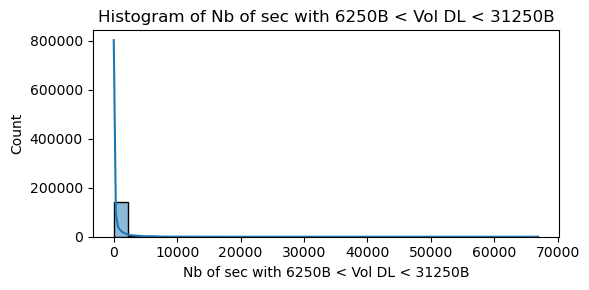

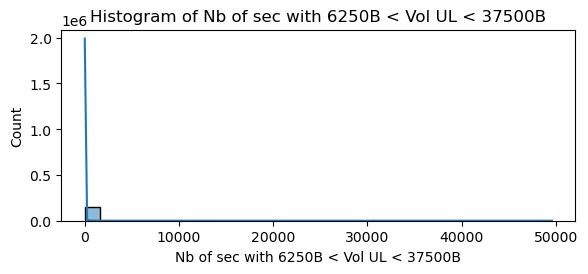

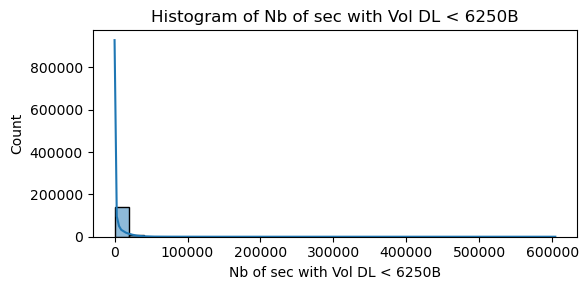

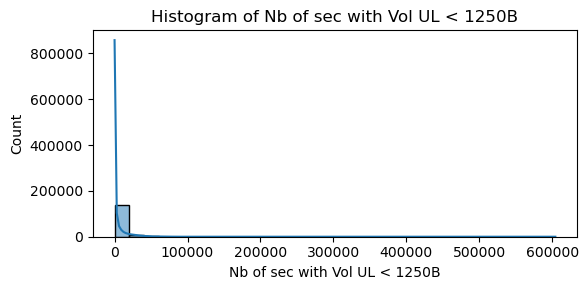

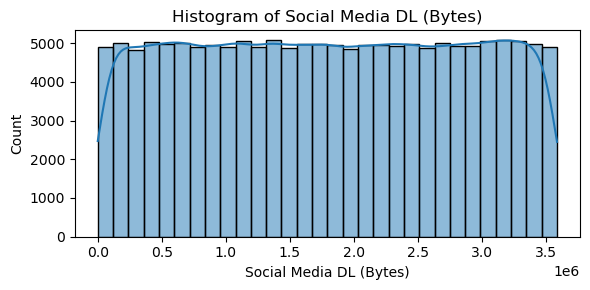

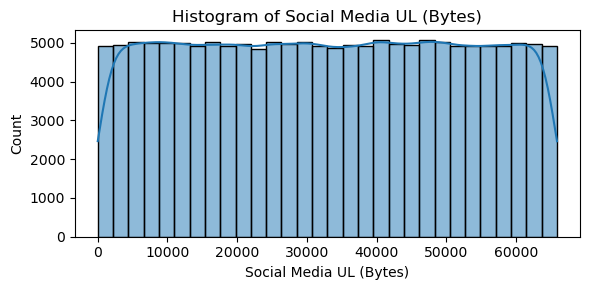

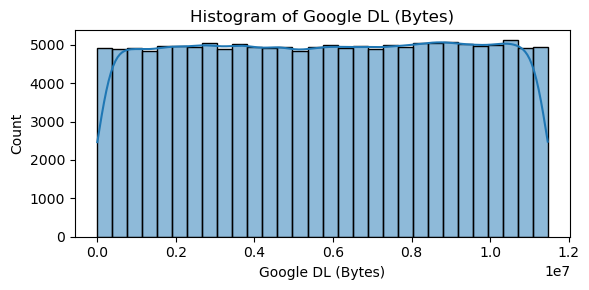

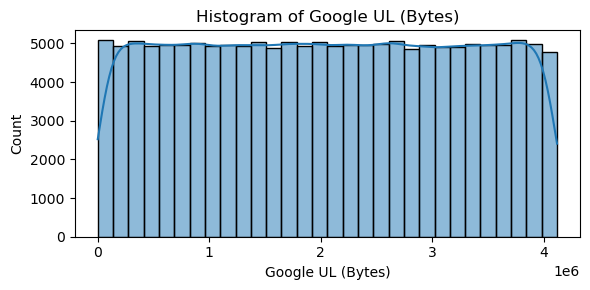

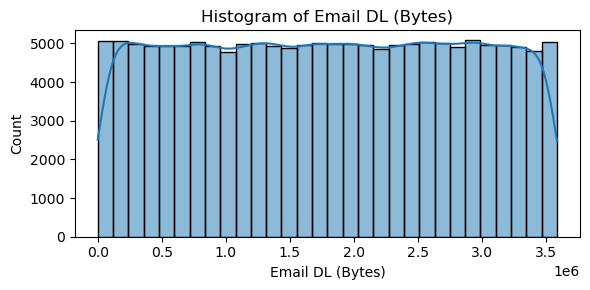

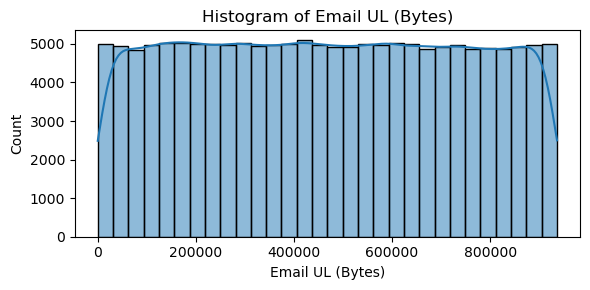

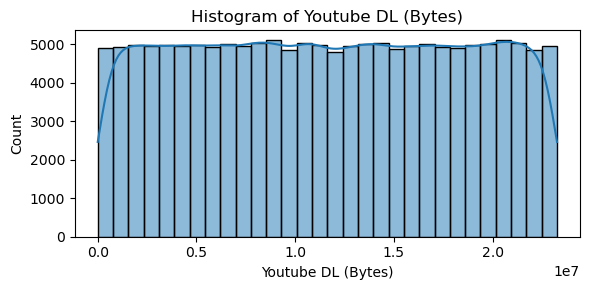

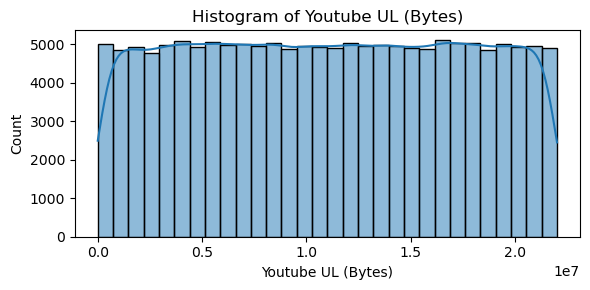

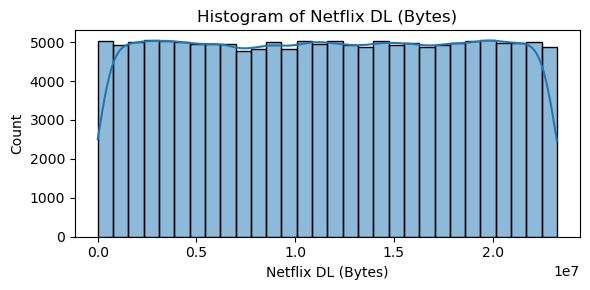

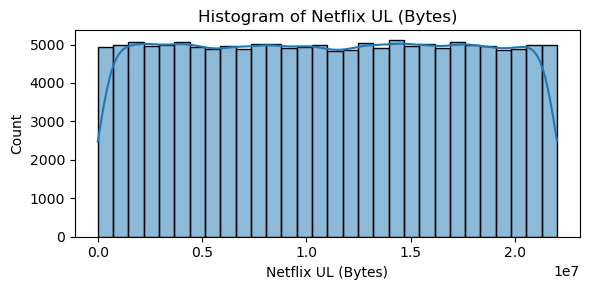

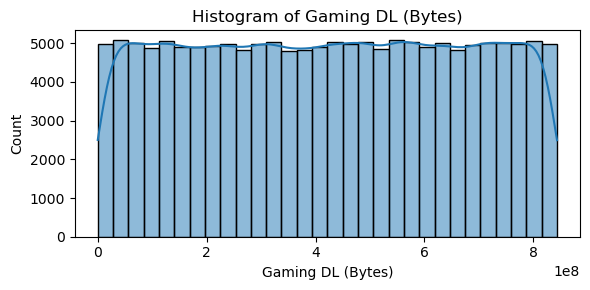

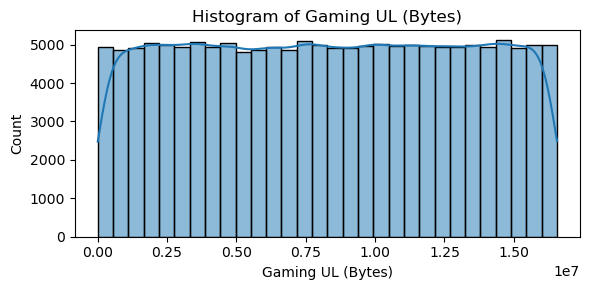

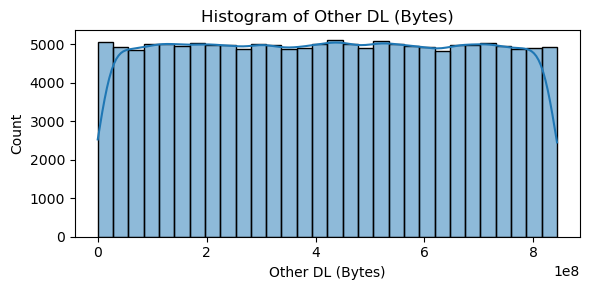

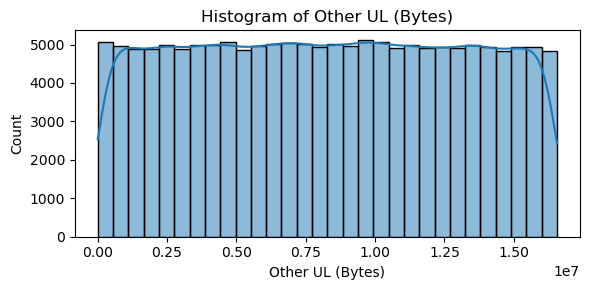

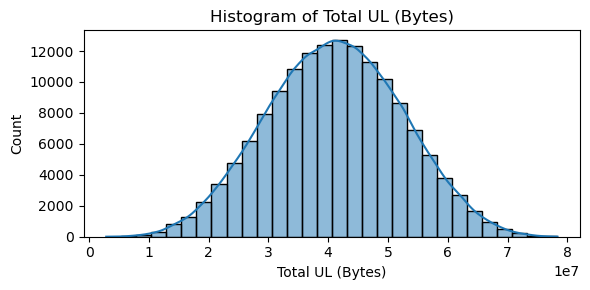

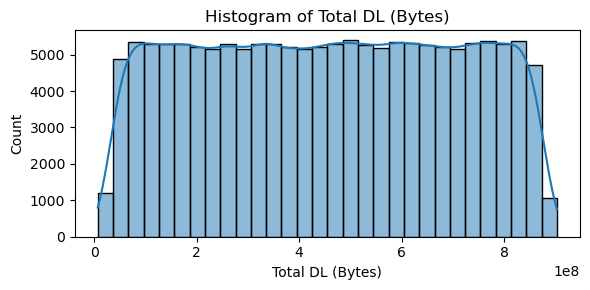

In [56]:
for col in quant_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

# Bivariate Analysis

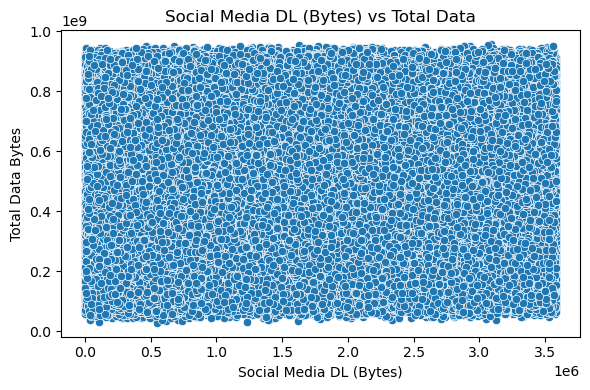

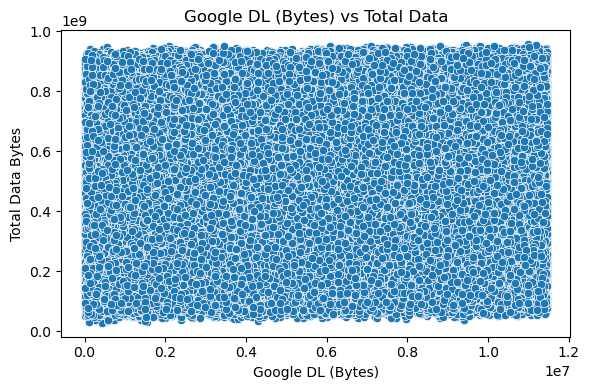

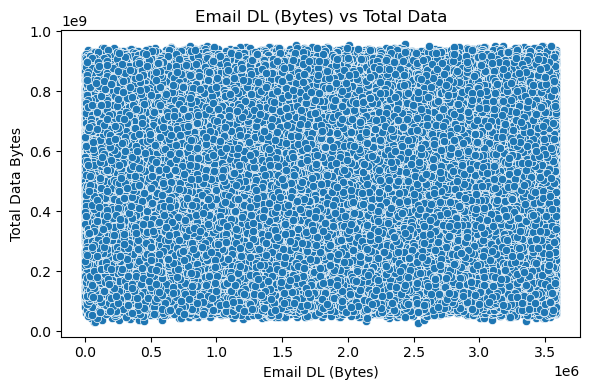

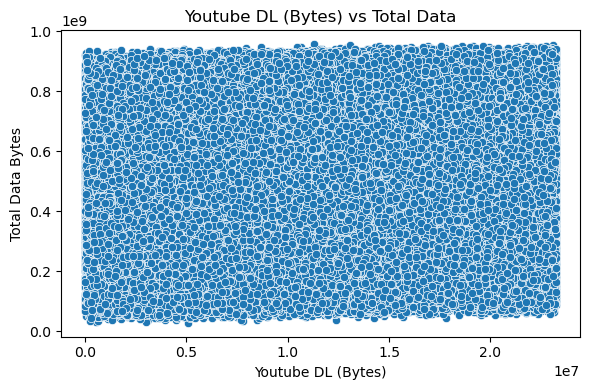

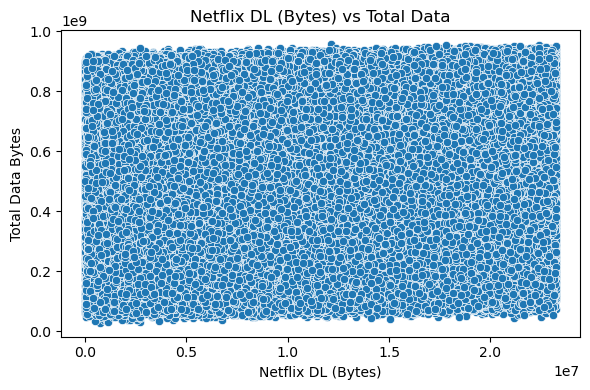

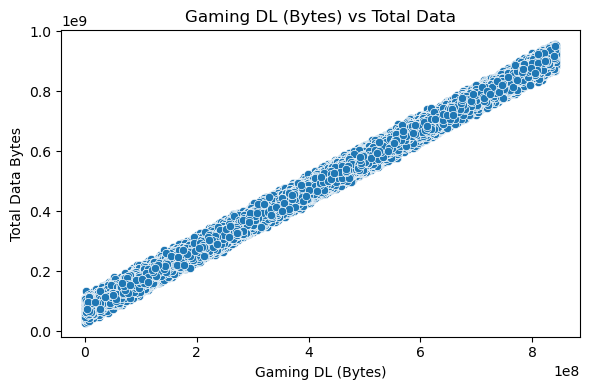

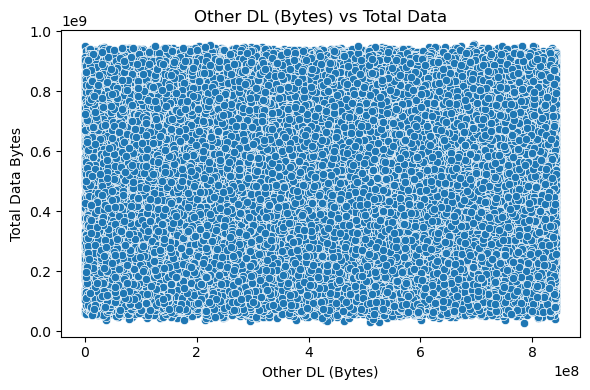

In [59]:
df['Total_Data_Bytes'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
apps = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']

for app in apps:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[app], y=df['Total_Data_Bytes'])
    plt.title(f'{app} vs Total Data')
    plt.xlabel(app)
    plt.ylabel('Total Data Bytes')
    plt.tight_layout()
    plt.show()


# Correlation Analysis

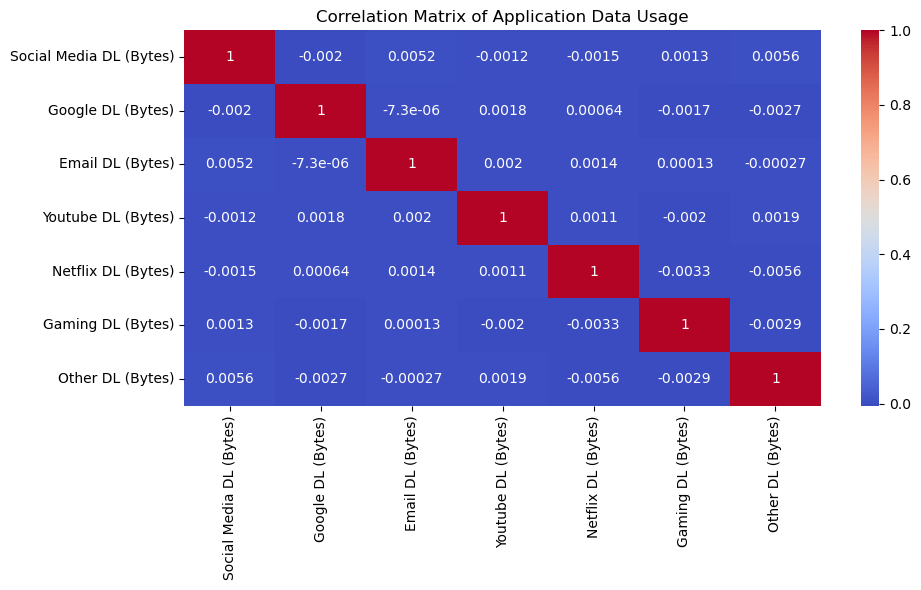

In [61]:
corr_vars = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
             'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']
corr_matrix = df[corr_vars].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Application Data Usage')
plt.tight_layout()
plt.show()

In [62]:
from sklearn.preprocessing import LabelEncoder
label_encoder_manu = LabelEncoder()
label_encoder_type = LabelEncoder()

df['Handset Manufacturer Encoded'] = label_encoder_manu.fit_transform(df['Handset Manufacturer'])
df['Handset Type Encoded'] = label_encoder_type.fit_transform(df['Handset Type'])


In [63]:
df.head()

Bearer Id          Start       Start ms  \
0 13114500000000000000.0000000000   4/4/19 12:01 770.0000000000   
1 13114500000000000000.0000000000   4/9/19 13:04 235.0000000000   
2 13114500000000000000.0000000000   4/9/19 17:42   1.0000000000   
3 13114500000000000000.0000000000   4/10/19 0:31 486.0000000000   
4 13114500000000000000.0000000000  4/12/19 20:10 565.0000000000   

             End         End ms          Dur. (ms)                       IMSI  \
0  4/25/19 14:35 662.0000000000 1823652.0000000000 208201448079117.0000000000   
1   4/25/19 8:15 606.0000000000 1365104.0000000000 208201909211140.0000000000   
2  4/25/19 11:58 652.0000000000 1361762.0000000000 208200314458056.0000000000   
3   4/25/19 7:36 171.0000000000 1321509.0000000000 208201402342131.0000000000   
4  4/25/19 10:40 954.0000000000 1089009.0000000000 208201401415120.0000000000   

           MSISDN/Number                      IMEI Last Location Name  \
0 33664962239.0000000000 35521209507511.0000000000        9.16457E+15   
1 33681854413.0000000000 35794009006359.0000000000            L77566A   
2 33760627129.0000000000 35281510359387.0000000000            D42335A   
3 33750343200.0000000000 35356610164913.0000000000            T21824A   
4 33699795932.0000000000 35407009745539.0000000000            D88865A   

   Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0    42.0000000000     5.0000000000            23.0000000000   
1    65.0000000000     5.0000000000            16.0000000000   
2     0.0000000000     0.0000000000             6.0000000000   
3     0.0000000000     0.0000000000            44.0000000000   
4     0.0000000000     0.0000000000             6.0000000000   

   Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
0            44.0000000000                 0.0000000000   
1            26.0000000000                 0.0000000000   
2             9.0000000000                 0.0000000000   
3            44.0000000000                 0.0000000000   
4             9.0000000000                 0.0000000000   

   TCP UL Retrans. Vol (Bytes)  DL TP < 50 Kbps (%)  \
0                 0.0000000000       100.0000000000   
1                 0.0000000000       100.0000000000   
2                 0.0000000000       100.0000000000   
3                 0.0000000000       100.0000000000   
4                 0.0000000000       100.0000000000   

   50 Kbps < DL TP < 250 Kbps (%)  250 Kbps < DL TP < 1 Mbps (%)  \
0                    0.0000000000                   0.0000000000   
1                    0.0000000000                   0.0000000000   
2                    0.0000000000                   0.0000000000   
3                    0.0000000000                   0.0000000000   
4                    0.0000000000                   0.0000000000   

   DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  10 Kbps < UL TP < 50 Kbps (%)  \
0        0.0000000000       100.0000000000                   0.0000000000   
1        0.0000000000       100.0000000000                   0.0000000000   
2        0.0000000000       100.0000000000                   0.0000000000   
3        0.0000000000       100.0000000000                   0.0000000000   
4        0.0000000000       100.0000000000                   0.0000000000   

   50 Kbps < UL TP < 300 Kbps (%)  UL TP > 300 Kbps (%)  HTTP DL (Bytes)  \
0                    0.0000000000          0.0000000000     0.0000000000   
1                    0.0000000000          0.0000000000     0.0000000000   
2                    0.0000000000          0.0000000000     0.0000000000   
3                    0.0000000000          0.0000000000     0.0000000000   
4                    0.0000000000          0.0000000000     0.0000000000   

   HTTP UL (Bytes)  Activity Duration DL (ms)  Activity Duration UL (ms)  \
0     0.0000000000           37624.0000000000           38787.0000000000   
1     0.0000000000             168.0000000000            3560.0000000000   
2     0.0000000000               0.0000000000               0.00000

In [64]:
df.shape

(148837, 58)

# Remove unnecessary and non-numeric columns to prepare the data for clustering.

In [68]:

drop_cols = ['Start','Start ms', 'End','End ms', 'IMSI', 'IMEI','Last Location Name', 'Avg RTT DL (ms)',
'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)','TCP DL Retrans. Vol (Bytes)',
'TCP UL Retrans. Vol (Bytes)','HTTP DL (Bytes)','HTTP UL (Bytes)','Nb of sec with 125000B < Vol DL',
'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL',
'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B',	'Nb of sec with Vol DL < 6250B',
'Nb of sec with Vol UL < 1250B','Total_Data_Bytes','Handset Manufacturer','Handset Type']

cluster_data = df.drop(columns=drop_cols, errors='ignore')
cluster_data.shape

(148837, 32)

In [69]:
cluster_data.columns

Index(['Bearer Id', 'Dur. (ms)', 'MSISDN/Number', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)',
       'Handset Manufacturer Encoded', 'Handset Type Encoded'],
      dtype='object')

In [70]:
features = ['Bearer Id', 'Dur. (ms)', 'MSISDN/Number', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)',
       'Handset Manufacturer Encoded', 'Handset Type Encoded']

df_clean = cluster_data.copy()

for col in features:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_clean = df_clean[~((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound))]
    

In [71]:
df_clean.shape

(64876, 32)

In [72]:
df_clean.head()

Bearer Id         Dur. (ms)          MSISDN/Number  \
92 13114500000000000000.0000000000 243504.0000000000 33685416886.0000000000   
93 13114500000000000000.0000000000 236570.0000000000 33661315626.0000000000   
95 13114500000000000000.0000000000 231780.0000000000 33615131469.0000000000   
96 13114500000000000000.0000000000 230839.0000000000 33664947886.0000000000   
98 13114500000000000000.0000000000 239954.0000000000 33668752351.0000000000   

    DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
92       100.0000000000                    0.0000000000   
93       100.0000000000                    0.0000000000   
95       100.0000000000                    0.0000000000   
96       100.0000000000                    0.0000000000   
98       100.0000000000                    0.0000000000   

    250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
92                   0.0000000000        0.0000000000       100.0000000000   
93                   0.0000000000        0.0000000000       100.0000000000   
95                   0.0000000000        0.0000000000       100.0000000000   
96                   0.0000000000        0.0000000000       100.0000000000   
98                   0.0000000000        0.0000000000       100.0000000000   

    10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
92                   0.0000000000                    0.0000000000   
93                   0.0000000000                    0.0000000000   
95                   0.0000000000                    0.0000000000   
96                   0.0000000000                    0.0000000000   
98                   0.0000000000                    0.0000000000   

    UL TP > 300 Kbps (%)  Activity Duration DL (ms)  \
92          0.0000000000           28253.0000000000   
93          0.0000000000           20168.0000000000   
95          0.0000000000           31466.0000000000   
96          0.0000000000            2335.0000000000   
98          0.0000000000           16196.0000000000   

    Activity Duration UL (ms)          Dur. (ms).1  Social Media DL (Bytes)  \
92           48628.0000000000 243504362.0000000000       2410108.0000000000   
93           23902.0000000000 236570803.0000000000       3219754.0000000000   
95           38457.0000000000 231780395.0000000000       2564038.0000000000   
96           74845.0000000000 230839500.0000000000       2555939.0000000000   
98           34133.0000000000 239954258.0000000000        504262.0000000000   

    Social Media UL (Bytes)  Google DL (Bytes)  Google UL (Bytes)  \
92         38223.0000000000 6639041.0000000000  433758.0000000000   
93         10632.0000000000 4259111.0000000000 1476690.0000000000   
95          6720.0000000000  962332.0000000000   38013.0000000000   
96         43849.0000000000 8477509.0000000000 1481177.0000000000   
98         64651.0000000000    6798.0000000000  553968.0000000000   

     Email DL (Bytes)  Email UL (Bytes)  Youtube DL (Bytes)  \
92 2653190.0000000000 882020.0000000000 17400892.0000000000   
93 3507108.0000000000 392491.0000000000 19431593.0000000000   
95 3144169.0000000000  64850.0000000000  7438887.0000000000   
96 3380596.0000000000 156347.0000000000  3334865.0000000000   
98  832675.0000000000 500257.0000000000 14851113.0000000000   

    Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
92 14644405.0000000000  7682779.0000000000 20806551.0000000000   
93 16964908.0000000000 11758420.0000000000  9907089.0000000000   
95 13154981.0000000000   753238.0000000000  9887128.0000000000   
96 14454366.0000000000 17917894.0000000000  1530332.0000000000   
98  1312259.0000000000 11225027.0000000000 15097330.0000000000   

      Gaming DL (Bytes)   Gaming UL (Bytes)     Other DL (Bytes)  \
92 519620584.0000000000  2710989.0000000000 318297673.0000000000   
93 715350506.0000000000 10250922.0000000000 290582586.0000000000   
95 124180544.0000000000 14967821.0000000000 350039548.0000000000   
96 293492651.0000000000  1362536.000000000

## Normalize features

In [74]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

# KMeans Clustering using Elbow Method to find optimal number of clusters

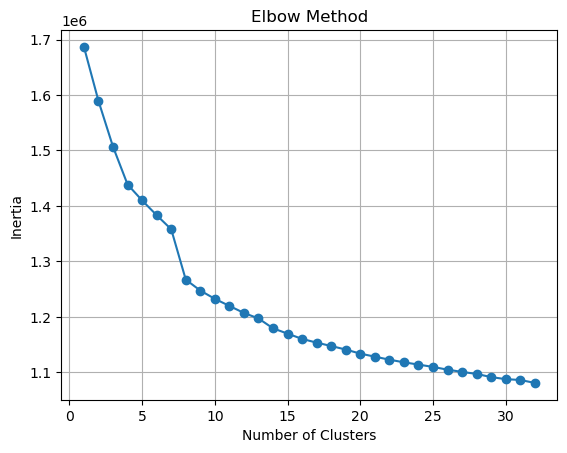

In [76]:
inertia = []
for k in range(1, 33):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 33), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

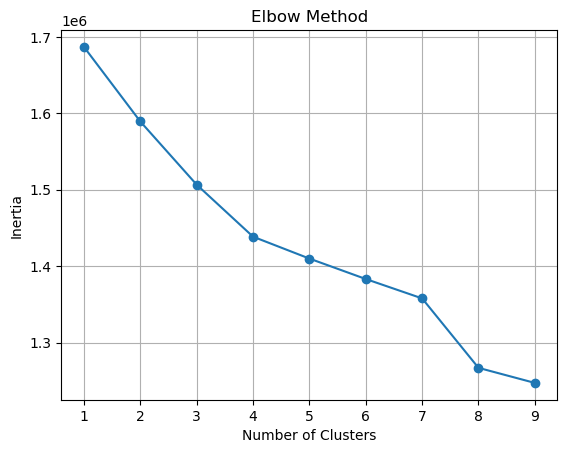

In [77]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# Applying KMeans

In [79]:
k = 8
kmeans = KMeans(n_clusters=k, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualizing cluster distribution with k=8

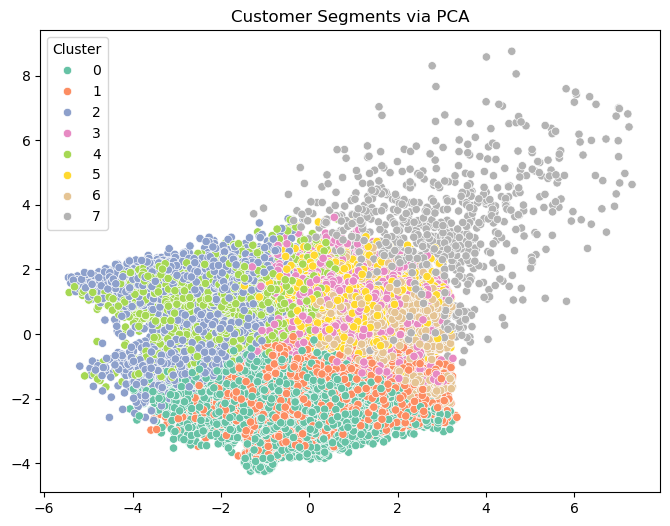

In [81]:

pca = PCA(n_components=15)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df_clean['Cluster'], palette='Set2')
plt.title('Customer Segments via PCA')
plt.show()


In [82]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=22)
df_clean['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualizing cluster distribution with k=3

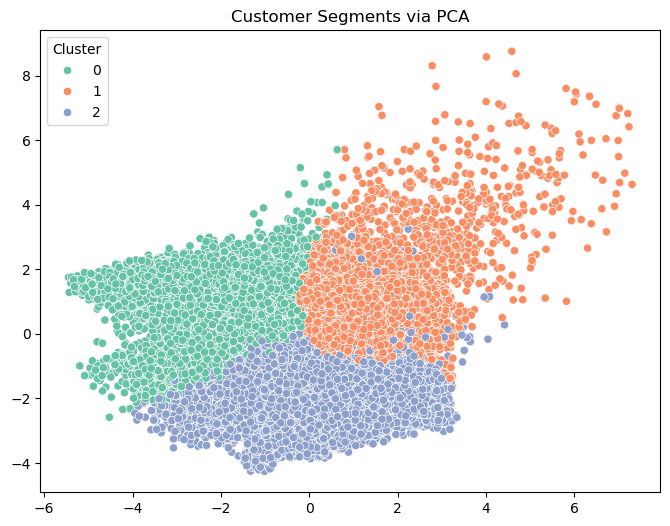

In [84]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df_clean['Cluster'], palette='Set2')
plt.title('Customer Segments via PCA')
plt.show()

# Infer :
# Clustering with k = 8
#### after practicing multiple PCA(n_components= range 2-30) Clusters are not well-separated.
#### Many clusters overlap significantly,which spreads across almost the entire PCA space.
#### This suggests that k=8 may be too high, leading to overfitting or poor cluster definition.
#### Some clusters are very small and dense, possibly capturing noise or weak sub-patterns.

# Clustering with k = 3
#### Clearer separation between clusters.
#### Each cluster seems to capture a distinct region in PCA space.
#### This implies better-defined groupings and likely more interpretable customer segments.
#### Visually, it supports the idea that 3 clusters is a more optimal choice for this data.


# Exporting cleaned and clustered data for SQL integration

In [87]:
df_clean.head()

Bearer Id         Dur. (ms)          MSISDN/Number  \
92 13114500000000000000.0000000000 243504.0000000000 33685416886.0000000000   
93 13114500000000000000.0000000000 236570.0000000000 33661315626.0000000000   
95 13114500000000000000.0000000000 231780.0000000000 33615131469.0000000000   
96 13114500000000000000.0000000000 230839.0000000000 33664947886.0000000000   
98 13114500000000000000.0000000000 239954.0000000000 33668752351.0000000000   

    DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
92       100.0000000000                    0.0000000000   
93       100.0000000000                    0.0000000000   
95       100.0000000000                    0.0000000000   
96       100.0000000000                    0.0000000000   
98       100.0000000000                    0.0000000000   

    250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
92                   0.0000000000        0.0000000000       100.0000000000   
93                   0.0000000000        0.0000000000       100.0000000000   
95                   0.0000000000        0.0000000000       100.0000000000   
96                   0.0000000000        0.0000000000       100.0000000000   
98                   0.0000000000        0.0000000000       100.0000000000   

    10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
92                   0.0000000000                    0.0000000000   
93                   0.0000000000                    0.0000000000   
95                   0.0000000000                    0.0000000000   
96                   0.0000000000                    0.0000000000   
98                   0.0000000000                    0.0000000000   

    UL TP > 300 Kbps (%)  Activity Duration DL (ms)  \
92          0.0000000000           28253.0000000000   
93          0.0000000000           20168.0000000000   
95          0.0000000000           31466.0000000000   
96          0.0000000000            2335.0000000000   
98          0.0000000000           16196.0000000000   

    Activity Duration UL (ms)          Dur. (ms).1  Social Media DL (Bytes)  \
92           48628.0000000000 243504362.0000000000       2410108.0000000000   
93           23902.0000000000 236570803.0000000000       3219754.0000000000   
95           38457.0000000000 231780395.0000000000       2564038.0000000000   
96           74845.0000000000 230839500.0000000000       2555939.0000000000   
98           34133.0000000000 239954258.0000000000        504262.0000000000   

    Social Media UL (Bytes)  Google DL (Bytes)  Google UL (Bytes)  \
92         38223.0000000000 6639041.0000000000  433758.0000000000   
93         10632.0000000000 4259111.0000000000 1476690.0000000000   
95          6720.0000000000  962332.0000000000   38013.0000000000   
96         43849.0000000000 8477509.0000000000 1481177.0000000000   
98         64651.0000000000    6798.0000000000  553968.0000000000   

     Email DL (Bytes)  Email UL (Bytes)  Youtube DL (Bytes)  \
92 2653190.0000000000 882020.0000000000 17400892.0000000000   
93 3507108.0000000000 392491.0000000000 19431593.0000000000   
95 3144169.0000000000  64850.0000000000  7438887.0000000000   
96 3380596.0000000000 156347.0000000000  3334865.0000000000   
98  832675.0000000000 500257.0000000000 14851113.0000000000   

    Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
92 14644405.0000000000  7682779.0000000000 20806551.0000000000   
93 16964908.0000000000 11758420.0000000000  9907089.0000000000   
95 13154981.0000000000   753238.0000000000  9887128.0000000000   
96 14454366.0000000000 17917894.0000000000  1530332.0000000000   
98  1312259.0000000000 11225027.0000000000 15097330.0000000000   

      Gaming DL (Bytes)   Gaming UL (Bytes)     Other DL (Bytes)  \
92 519620584.0000000000  2710989.0000000000 318297673.0000000000   
93 715350506.0000000000 10250922.0000000000 290582586.0000000000   
95 124180544.0000000000 14967821.0000000000 350039548.0000000000   
96 293492651.0000000000  1362536.000000000

In [90]:
df_clean.to_csv('/Users/ranjitsingh/Documents/Nexthikes-Projects/Project5-unsupervised learning.Project_5data.csv', index=False)

# Visualizing Clusters Across Multiple Features

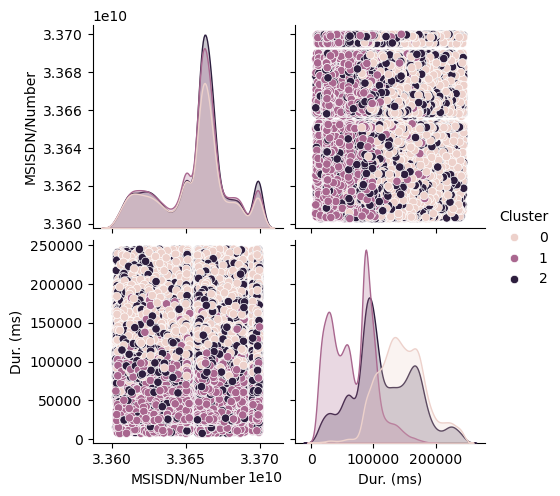

In [102]:
sns.pairplot(df_clean, hue='Cluster',vars=['MSISDN/Number', 'Dur. (ms)'])
plt.show()

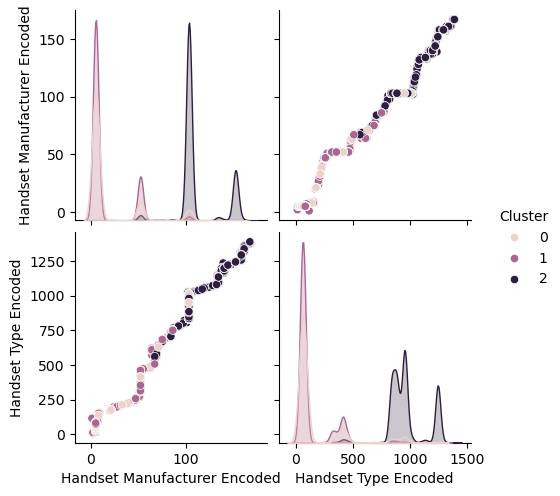

In [103]:
sns.pairplot(df_clean, hue='Cluster',vars=['Handset Manufacturer Encoded', 'Handset Type Encoded'])
plt.show()

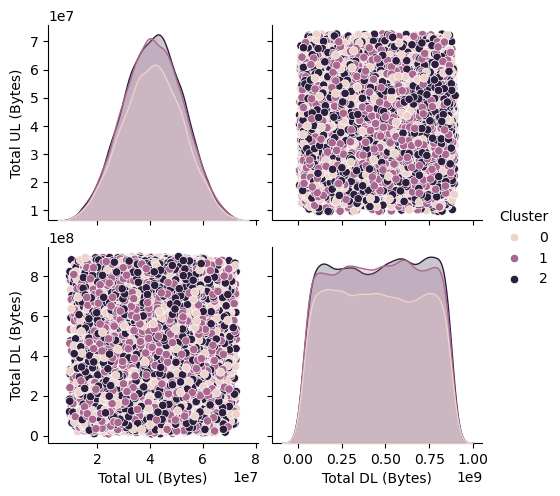

In [104]:
sns.pairplot(df_clean, hue='Cluster',vars=['Total UL (Bytes)', 'Total DL (Bytes)'])
plt.show()

# Compute Euclidean Distance

In [106]:
from scipy.cluster.hierarchy import dendrogram, linkage

Even after reducing to 2 PCA components,dataset has many rows, the dendrogram function tries to plot one leaf per point,
which Consumes a lot of memory, Overloads the rendering engine (matplotlib struggles with that many leaf nodes),Causing crashes
Hence: 
performing dendrogram plot with less sample size

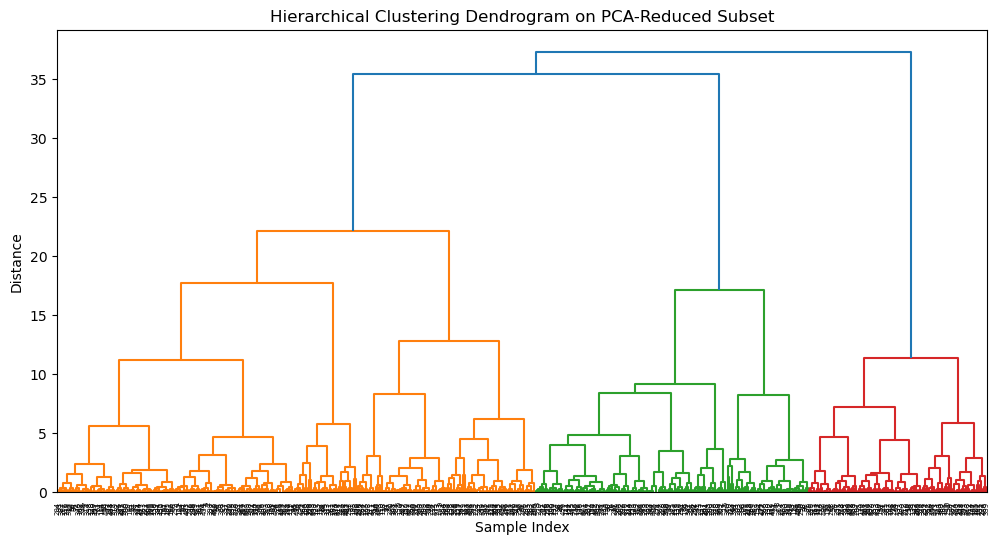

In [108]:
subset_indices = np.random.choice(scaled_data.shape[0], size=500, replace=False)
subset_data = scaled_data[subset_indices]

pca = PCA(n_components=2)
subset_data_2d = pca.fit_transform(subset_data)

linked = linkage(subset_data_2d, method='ward')

plt.figure(figsize=(12,6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram on PCA-Reduced Subset')
plt.show()


# Infer:
Hierarchical Structure:
The tree-like structure shows how clusters are progressively merged based on similarity (Euclidean distance in PCA space).
Lower joins (near the bottom) indicate closer samples, while higher joins represent merging of larger, less similar groups.

Cluster Compactness : 
The bottom parts of the tree are denser, meaning many samples are closely related.
The larger vertical distances in upper levels indicate some well-separated high-level groupings.



# Thank you